In [3]:
import mdsine2 as md2
from mdsine2.names import STRNAMES
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import os
import pandas as pd
from pathlib import Path
import matplotlib.cm as cm
import seaborn as sns
from sklearn.metrics import mean_squared_error
import h5py

md2.visualization.set_perturbation_color('gray')

In [55]:
filename = "mcnulty-results/LF0/traces.hdf5"

with h5py.File(filename, "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print("Keys: %s" % f.keys())
    # get first object name/key; may or may NOT be a group
    a_group_key = list(f.keys())[2]

    # get the object type for a_group_key: usually group or dataset
    print(type(f[a_group_key])) 

    # If a_group_key is a group name, 
    # this gets the object names in the group and returns as a list
    data = list(f[a_group_key])

    # preferred methods to get dataset values:
    ds_obj = f[a_group_key]      # returns as a h5py dataset object
    ds_arr = f[a_group_key][()]  # returns as a numpy array

Keys: <KeysViewHDF5 ['Cluster interaction indicator parameter', 'Cluster interaction probability', 'Growth parameter', 'HF', 'Interactions object', 'Latent trajectory parameter_1', 'Latent trajectory parameter_2', 'Latent trajectory parameter_3', 'Latent trajectory parameter_4', 'Latent trajectory parameter_5', 'Latent trajectory parameter_6', 'Latent trajectory parameter_7', 'Mean parameter for the normal prior of the interaction parameter', 'Mean parameter for the normal prior of the perturbation parameter_HF', 'Mean parameter for the truncated normal prior of the growth parameter', 'Mean parameter for the truncated normal prior of the self-interaction parameter', 'Process Variance parameter', 'Self interaction parameter', 'Variance parameter for the normal prior of the interaction parameter', 'Variance parameter for the normal prior of the perturbation parameter_HF']>
<class 'h5py._hl.dataset.Dataset'>


In [56]:
data

[array([0.07204864, 0.31057642, 0.27212601, 0.31332173, 0.47624935,
        0.10188285, 0.22541444, 0.07429323, 0.03101468, 0.24273999,
        1.97790467, 0.41723347]),
 array([0.09938868, 0.19621617, 0.20357887, 0.26358176, 0.55894251,
        0.11558776, 0.1356287 , 0.08378483, 0.03918979, 0.34129496,
        2.04513076, 0.41744854]),
 array([0.08625302, 0.20617503, 0.09460302, 0.12721477, 0.52608812,
        0.09891503, 0.0623055 , 0.14098652, 0.04701035, 0.26115951,
        2.09171856, 0.43373417]),
 array([0.19497868, 0.14906838, 0.11286666, 0.1478211 , 0.53012777,
        0.19740028, 0.05599174, 0.15652691, 0.07000932, 0.23231056,
        2.16934397, 0.56381433]),
 array([0.22266645, 0.16169668, 0.05902136, 0.13925144, 0.50369011,
        0.25104711, 0.18691364, 0.20746242, 0.05090849, 0.21804471,
        2.18344404, 0.60851469]),
 array([0.26992144, 0.13370452, 0.08805867, 0.26289097, 0.42915949,
        0.32508117, 0.15952466, 0.17628203, 0.07602578, 0.23923943,
        2.0994

In [30]:
a = np.array(data)

In [31]:
a.shape

(25000, 12)

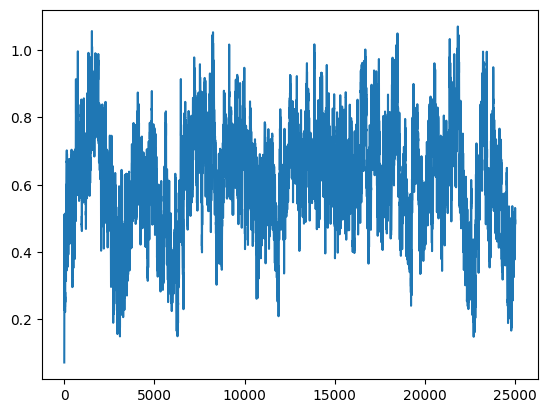

In [59]:
plt.plot(a[:,0])

(array([  14.,  424., 1316., 2674., 4672., 6963., 5353., 2597.,  865.,
         122.]),
 array([0.07204864, 0.17188119, 0.27171374, 0.37154629, 0.47137884,
        0.57121139, 0.67104394, 0.77087649, 0.87070904, 0.97054159,
        1.07037414]),
 <BarContainer object of 10 artists>)

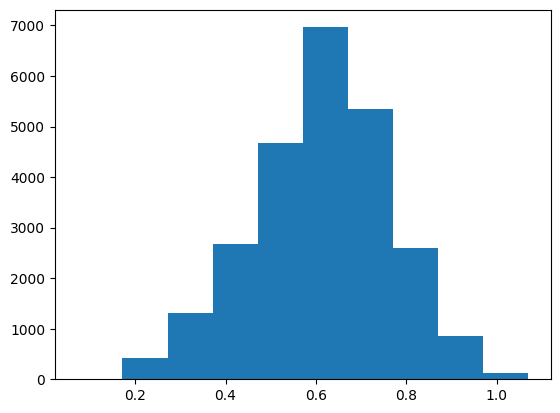

In [37]:
plt.hist(a[:,0])

In [27]:
mcmc = pd.read_pickle('mcnulty-results/LF0/mcmc.pkl')
growth_rates = mcmc.graph[STRNAMES.GROWTH_VALUE]
growth_trace = growth_rates.get_trace_from_disk(section='posterior', filename='mcnulty-results/LF0/traces.hdf5')

TypeError: get_trace_from_disk() got an unexpected keyword argument 'filename'